In [1]:
#Jenny Yu 4/25/2016

In [2]:
import numpy as np
import pandas as pd

In [3]:
train=pd.read_csv('train.csv',parse_dates=['Dates']) 
test=pd.read_csv('test.csv',parse_dates=['Dates']) 
#parse_dates to make sure the Dates column is handled as datetime63 dtype

In [4]:
train.Dates.head()

0   2015-05-13 23:53:00
1   2015-05-13 23:53:00
2   2015-05-13 23:33:00
3   2015-05-13 23:30:00
4   2015-05-13 23:30:00
Name: Dates, dtype: datetime64[ns]

In [5]:
hour = train.Dates.dt.hour
train['hour']=hour

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline  

In [7]:
import seaborn as sns

In [8]:
sns.set_style("ticks")
sns.set_context({"figure.figsize": (24, 10)})

In [9]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.metrics import log_loss
from sklearn.naive_bayes import BernoulliNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from matplotlib import cm

In [10]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,hour
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,23
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,23
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,23


16             LARCENY/THEFT
21            OTHER OFFENSES
20              NON-CRIMINAL
1                    ASSAULT
7              DRUG/NARCOTIC
36             VEHICLE THEFT
35                 VANDALISM
37                  WARRANTS
4                   BURGLARY
32            SUSPICIOUS OCC
19            MISSING PERSON
25                   ROBBERY
13                     FRAUD
12    FORGERY/COUNTERFEITING
27           SECONDARY CODES
Name: Category, dtype: object

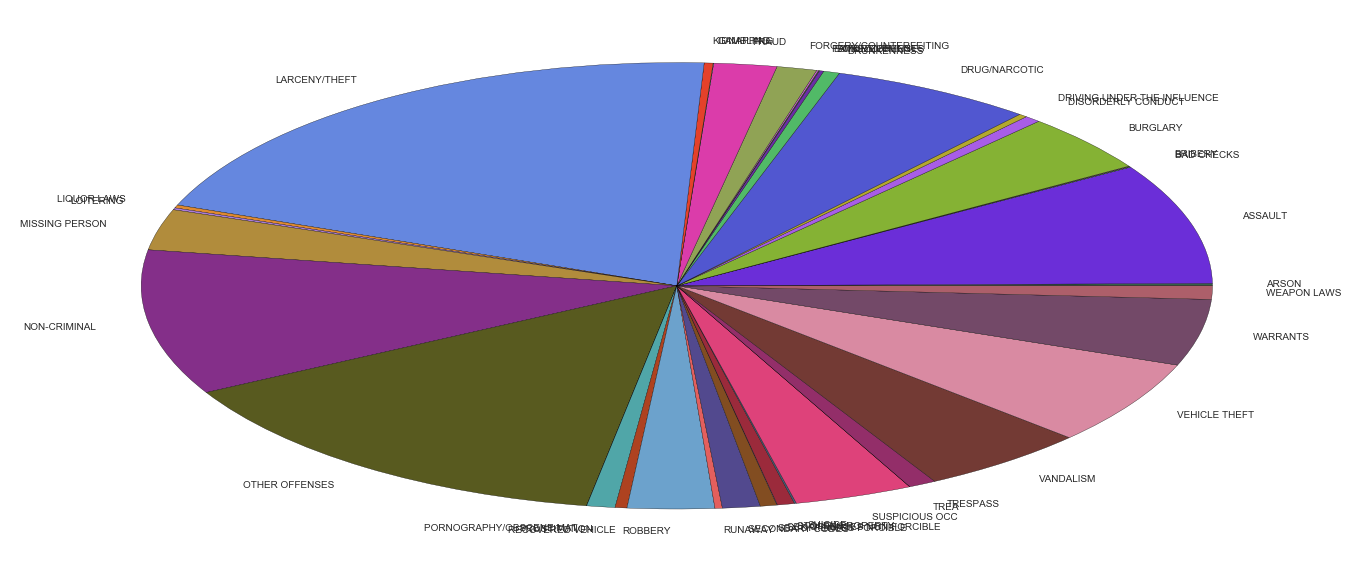

In [11]:
## bar plot to examine crime categories based on PdDistrict
crime_count=train.groupby(['Category','PdDistrict']).size()
#set the count numbers into DataFrame for Category + PdDistrict
summary=pd.DataFrame({'count':crime_count}).reset_index()
#find total number of crime in each category then plot pie chart
summary2=summary.groupby('Category').sum().reset_index()
c=[
"#356146",
"#6B2ED8",
	"#4EBC32",
	"#CF35E0",
	"#85B234",
	"#A85DE7",
	"#B4A82E",
	"#5157D0",
	"#51BA67",
	"#6A2DA6",
	"#407B2A",
	"#D463D5",
	"#90A355",
	"#DB3CAA",
	"#5AB086",
	"#E4412A",
	"#6587DF",
	"#DF8A2F",
	"#AC7CDA",
	"#B18C3C",
	"#842F89",
	"#585A1F",
	"#D773B6",
	"#50A6A8",
	"#AE4220",
	"#6CA2CC",
	"#E35F5D",
	"#52498E",
	"#824D21",
	"#AD90C5",
	"#9B2A3B",
	"#445E7A",
	"#DE427A",
	"#D28461",
	"#932E69",
	"#733A34",
	"#D98AA2",
	"#734968",
	"#AD5F6A"
]

plt.pie(summary2['count'], labels=summary2['Category'], colors=c)
#find the top 15 crime categories
summary3=summary2.sort_values('count', ascending=False)
top15=summary3[0:15]
top15['Category']

In [12]:
topCrime=summary[summary['Category'].isin(top15['Category'])]
## this selects the top 15 crimes using the boolean function .isin
topCrime.head()

,Category,PdDistrict,count
10,ASSAULT,BAYVIEW,9857
11,ASSAULT,CENTRAL,6977
12,ASSAULT,INGLESIDE,8533
13,ASSAULT,MISSION,11149
14,ASSAULT,NORTHERN,8318


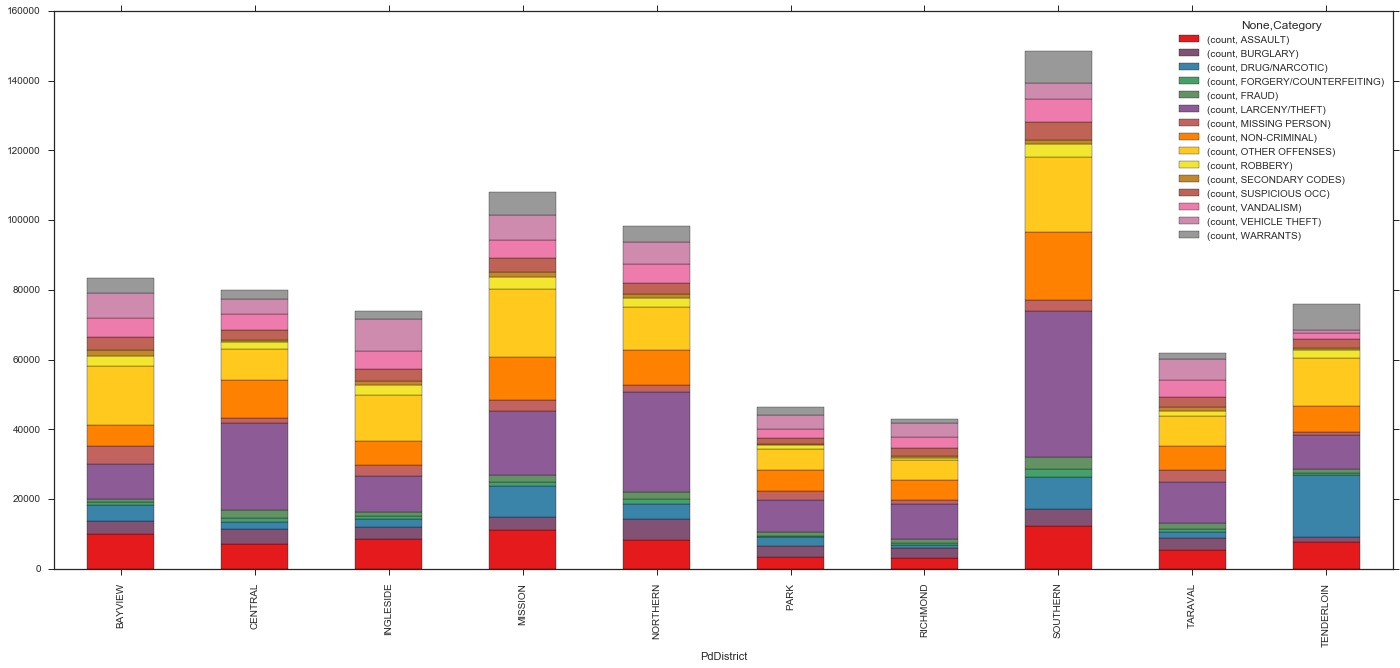

In [13]:
#bar plots for the PdDistrict
pivotPlot=topCrime.pivot(index='PdDistrict', columns='Category')
p1=pivotPlot.plot(kind='bar', stacked=True, colormap='Set1')

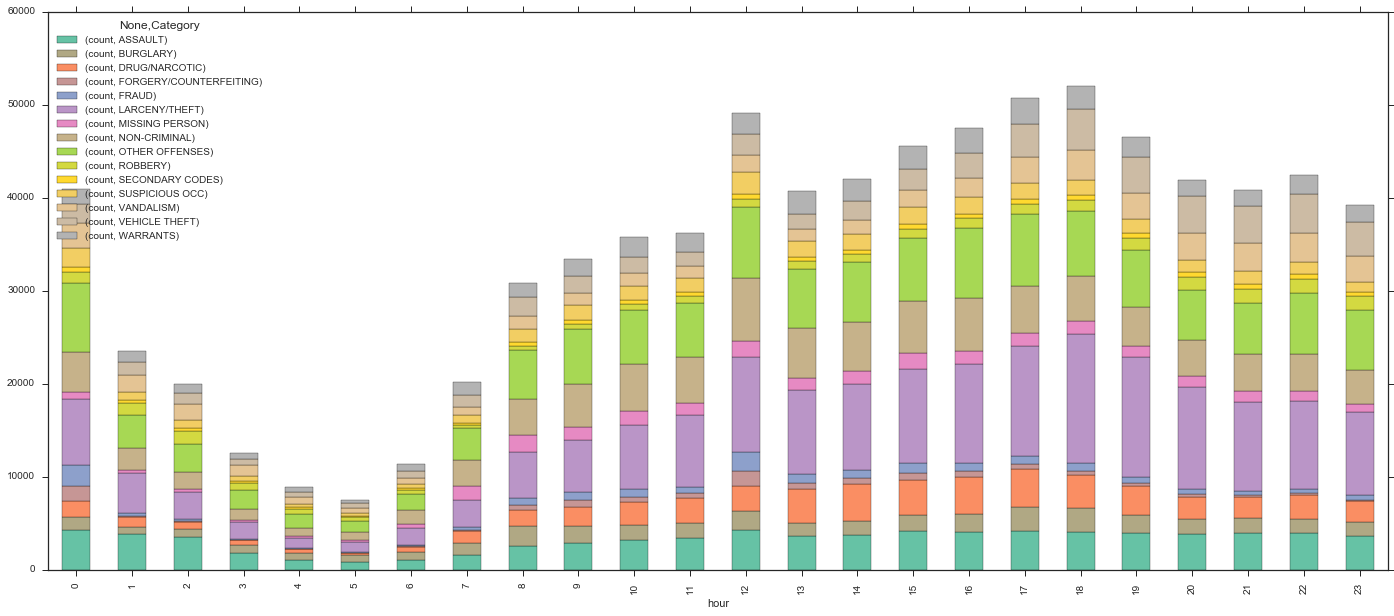

In [14]:
topCrime2=train[train['Category'].isin(top15['Category'])]
## this selects the top 15 crimes using the boolean function .isin
#groupby category and hour, then do count
crime_count2=topCrime2.groupby(['Category','hour']).size()
crime_count2=pd.DataFrame({'count':crime_count2}).reset_index()
pivotPlot2=crime_count2.pivot(index='hour',columns="Category")
p2=pivotPlot2.plot(kind='bar', stacked=True, colormap='Set2')


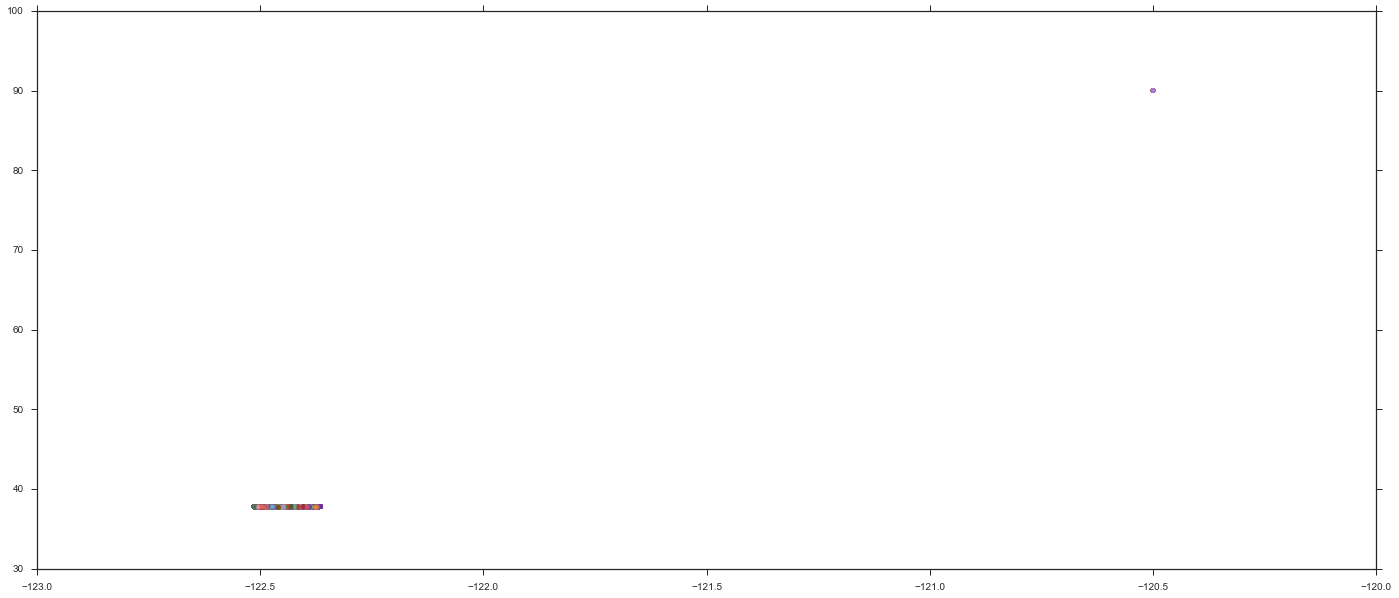

In [15]:
#plot the crime on X,Y map
c=[
"#356146",
"#6B2ED8",
	"#4EBC32",
	"#CF35E0",
	"#85B234",
	"#A85DE7",
	"#B4A82E",
	"#5157D0",
	"#51BA67",
	"#6A2DA6",
	"#407B2A",
	"#D463D5",
	"#90A355",
	"#DB3CAA",
	"#5AB086",
	"#E4412A",
	"#6587DF",
	"#DF8A2F",
	"#AC7CDA",
	"#B18C3C",
	"#842F89",
	"#585A1F",
	"#D773B6",
	"#50A6A8",
	"#AE4220",
	"#6CA2CC",
	"#E35F5D",
	"#52498E",
	"#824D21",
	"#AD90C5",
	"#9B2A3B",
	"#445E7A",
	"#DE427A",
	"#D28461",
	"#932E69",
	"#733A34",
	"#D98AA2",
	"#734968",
	"#AD5F6A"
]

fig, ax = plt.subplots()
ax.scatter (topCrime2['X'],topCrime2['Y'],marker = 'o', color=c)
plt.show()

In [16]:
# after examining the features, preprocess the Category labels and vectorize the features into binary form

In [17]:
CrimeData = preprocessing.LabelEncoder()

In [18]:
#Convert crime labels to label numbers named cData
cData = CrimeData.fit_transform(train.Category)


In [19]:
train.Dates.head()


0   2015-05-13 23:53:00
1   2015-05-13 23:53:00
2   2015-05-13 23:33:00
3   2015-05-13 23:30:00
4   2015-05-13 23:30:00
Name: Dates, dtype: datetime64[ns]

In [20]:
# get binary vectors for months, districts, and hours.
month=pd.get_dummies(train.Dates.dt.month)
month2=pd.get_dummies(test.Dates.dt.month)
neighborhood = pd.get_dummies(train.PdDistrict)
neighborhood2 = pd.get_dummies(test.PdDistrict)
hour = train.Dates.dt.hour
hour = pd.get_dummies(hour) 
hour2=test.Dates.dt.hour
hour2=pd.get_dummies(hour2)
month.columns=['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec']
month2.columns=['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec']

In [21]:
#Build new array for training set
train_data = pd.concat([hour, month,neighborhood], axis=1)
train_data['crime']=cData
train_data['Y']=train['Y']
#Build new array for test set
test_data = pd.concat([hour2,month2, neighborhood2], axis=1)
test_data['Y']=test['Y']

In [22]:
months=month.columns.tolist()
hours=hour.columns.tolist()

In [23]:
features = hours + months+ ['BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION',
 'NORTHERN', 'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN', 'Y']
features

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 'Jan',
 'Feb',
 'March',
 'April',
 'May',
 'June',
 'July',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec',
 'BAYVIEW',
 'CENTRAL',
 'INGLESIDE',
 'MISSION',
 'NORTHERN',
 'PARK',
 'RICHMOND',
 'SOUTHERN',
 'TARAVAL',
 'TENDERLOIN',
 'Y']

In [24]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN,crime,Y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,37,37.774599
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,21,37.774599
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,21,37.800414
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,16,37.800873
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,16,37.771541


In [25]:
training, validation = train_test_split(train_data, train_size=.80, random_state=3)


In [26]:
model = BernoulliNB()
#BernoulliNB--> this class requires samples to be represented as binary-valued feature vectors; 
#if handed any other kind of data, 
#a BernoulliNB instance may binarize its input (depending on the binarize parameter).

In [27]:
model.fit(training[features], training['crime'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [28]:
predicted = np.array(model.predict_proba(validation[features]))


In [29]:
accuracy=model.score(validation[features], validation['crime'])


In [30]:
print (accuracy)

0.2225841353


In [31]:

log_loss(validation['crime'], predicted) 

2.5851601067276961

In [32]:
from sklearn.calibration import CalibratedClassifierCV
calib_iso=CalibratedClassifierCV(model, cv=3, method='isotonic')

In [33]:
calib_iso.fit(training[features], training['crime'])

CalibratedClassifierCV(base_estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
            cv=3, method='isotonic')

In [34]:
prob_pos_iso= calib_iso.predict_proba(validation[features])


In [35]:

log_loss(validation['crime'], prob_pos_iso) 
# slight improvement over Bernoulli

2.5827462664650596

In [195]:
#write result to .csv for test set
model=BernoulliNB()
model.fit(train_data[features], train_data['crime'])

test_predicted = np.array(model.predict_proba(test_data[features]))

prediction=pd.DataFrame(test_predicted, columns=CrimeData.classes_)
prediction.head()
prediction.to_csv('testPrediction(2).csv', index = True, index_label = 'Id' )